# Imports

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [204]:
sns.set_theme()

# Loading data and retrieving information about downloaded dataset

In [206]:
data_info = pd.read_csv("./data/train_mod.csv")
data_info.columns

Index(['rating', 'playback_used', 'ebird_code', 'channels', 'date', 'pitch',
       'duration', 'filename', 'speed', 'species', 'number_of_notes', 'title',
       'secondary_labels', 'bird_seen', 'sci_name', 'location', 'latitude',
       'sampling_rate', 'type', 'elevation', 'description', 'bitrate_of_mp3',
       'file_type', 'volume', 'background', 'xc_id', 'url', 'country',
       'author', 'primary_label', 'longitude', 'length', 'time', 'recordist',
       'license', 'resampled_sampling_rate', 'resampled_filename',
       'resampled_channels'],
      dtype='object')

In [207]:
data_info.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,author,primary_label,longitude,length,time,recordist,license,resampled_sampling_rate,resampled_filename,resampled_channels
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,32000,XC134874.wav,1 (mono)
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,32000,XC135454.wav,1 (mono)
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,32000,XC135455.wav,1 (mono)
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,32000,XC135456.wav,1 (mono)
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,32000,XC135457.wav,1 (mono)


In [208]:
species = data_info["ebird_code"].unique()
species[:10]

array(['aldfly', 'ameavo', 'amebit', 'amecro', 'amegfi', 'amekes',
       'amepip', 'amered', 'amerob', 'amewig'], dtype=object)

In [209]:
current_dataset_species = os.listdir("./data")
current_dataset_species.remove("train_mod.csv")

In [210]:
filtered_data_info = data_info[data_info["ebird_code"].isin(current_dataset_species)]

# Functions

In [211]:
def count_num_of_wav_files(species: str) -> dict[str, int]:
    path = f"./data/{species}"
    samples_num = len(os.listdir(path))
    return samples_num

# Data exploring

In [220]:
COLORS = ["#66c2a5", "#fc8d62", "#8da0cb"]
RECORDS_LEN_IN_MINUTES = round(filtered_data_info["duration"].sum() / 60, 2)
RECORDS_LEN_IN_MINUTES

3488.38

In [213]:
df = {
    "Species": [],
    "NumOfAudioFiles": [],
}

for species in current_dataset_species:
    df["Species"].append(species)
    df["NumOfAudioFiles"].append(count_num_of_wav_files(species))

In [214]:
df = pd.DataFrame.from_dict(df)
df.head()

,Species,NumOfAudioFiles
0,cacwre,100
1,calgul,40
2,calqua,90
3,camwar,76
4,cangoo,100


In [215]:
print(f"Mean number of files for each species: {round(df["NumOfAudioFiles"].mean(), 2)}")

Mean number of files for each species: 83.57


Text(0.5, 1.0, 'Distribution of audio files for species')

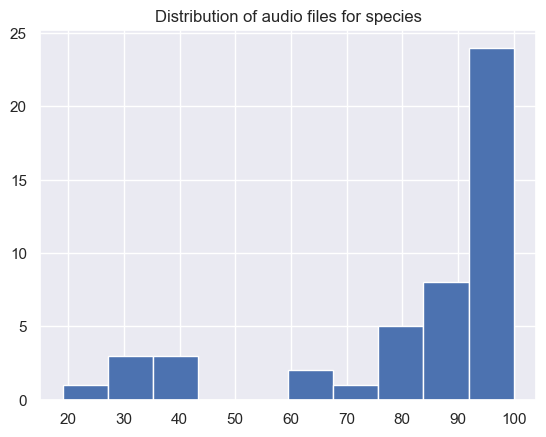

In [216]:
df.hist()
plt.title("Distribution of audio files for species")

In [222]:
df = {
    "Species": [],
    "TotalAudioRecordLengthInMinutes": [],
    "PercentageOfAllRecords": [],
    "MeanOfAudioLengthInMinutes": []
}

for species in current_dataset_species:
    df["Species"].append(species)
    
    species_column = data_info[data_info["ebird_code"] == species]["duration"]
    lng = species_column.sum() / 60
    audio_mean_lng = species_column.mean() / 60
    df["TotalAudioRecordLengthInMinutes"].append(lng)
    df["PercentageOfAllRecords"].append((lng / RECORDS_LEN_IN_MINUTES) * 100)
    df["MeanOfAudioLengthInMinutes"].append(audio_mean_lng)

Text(0.5, 1.0, 'Species and their sum of records length in minutes')

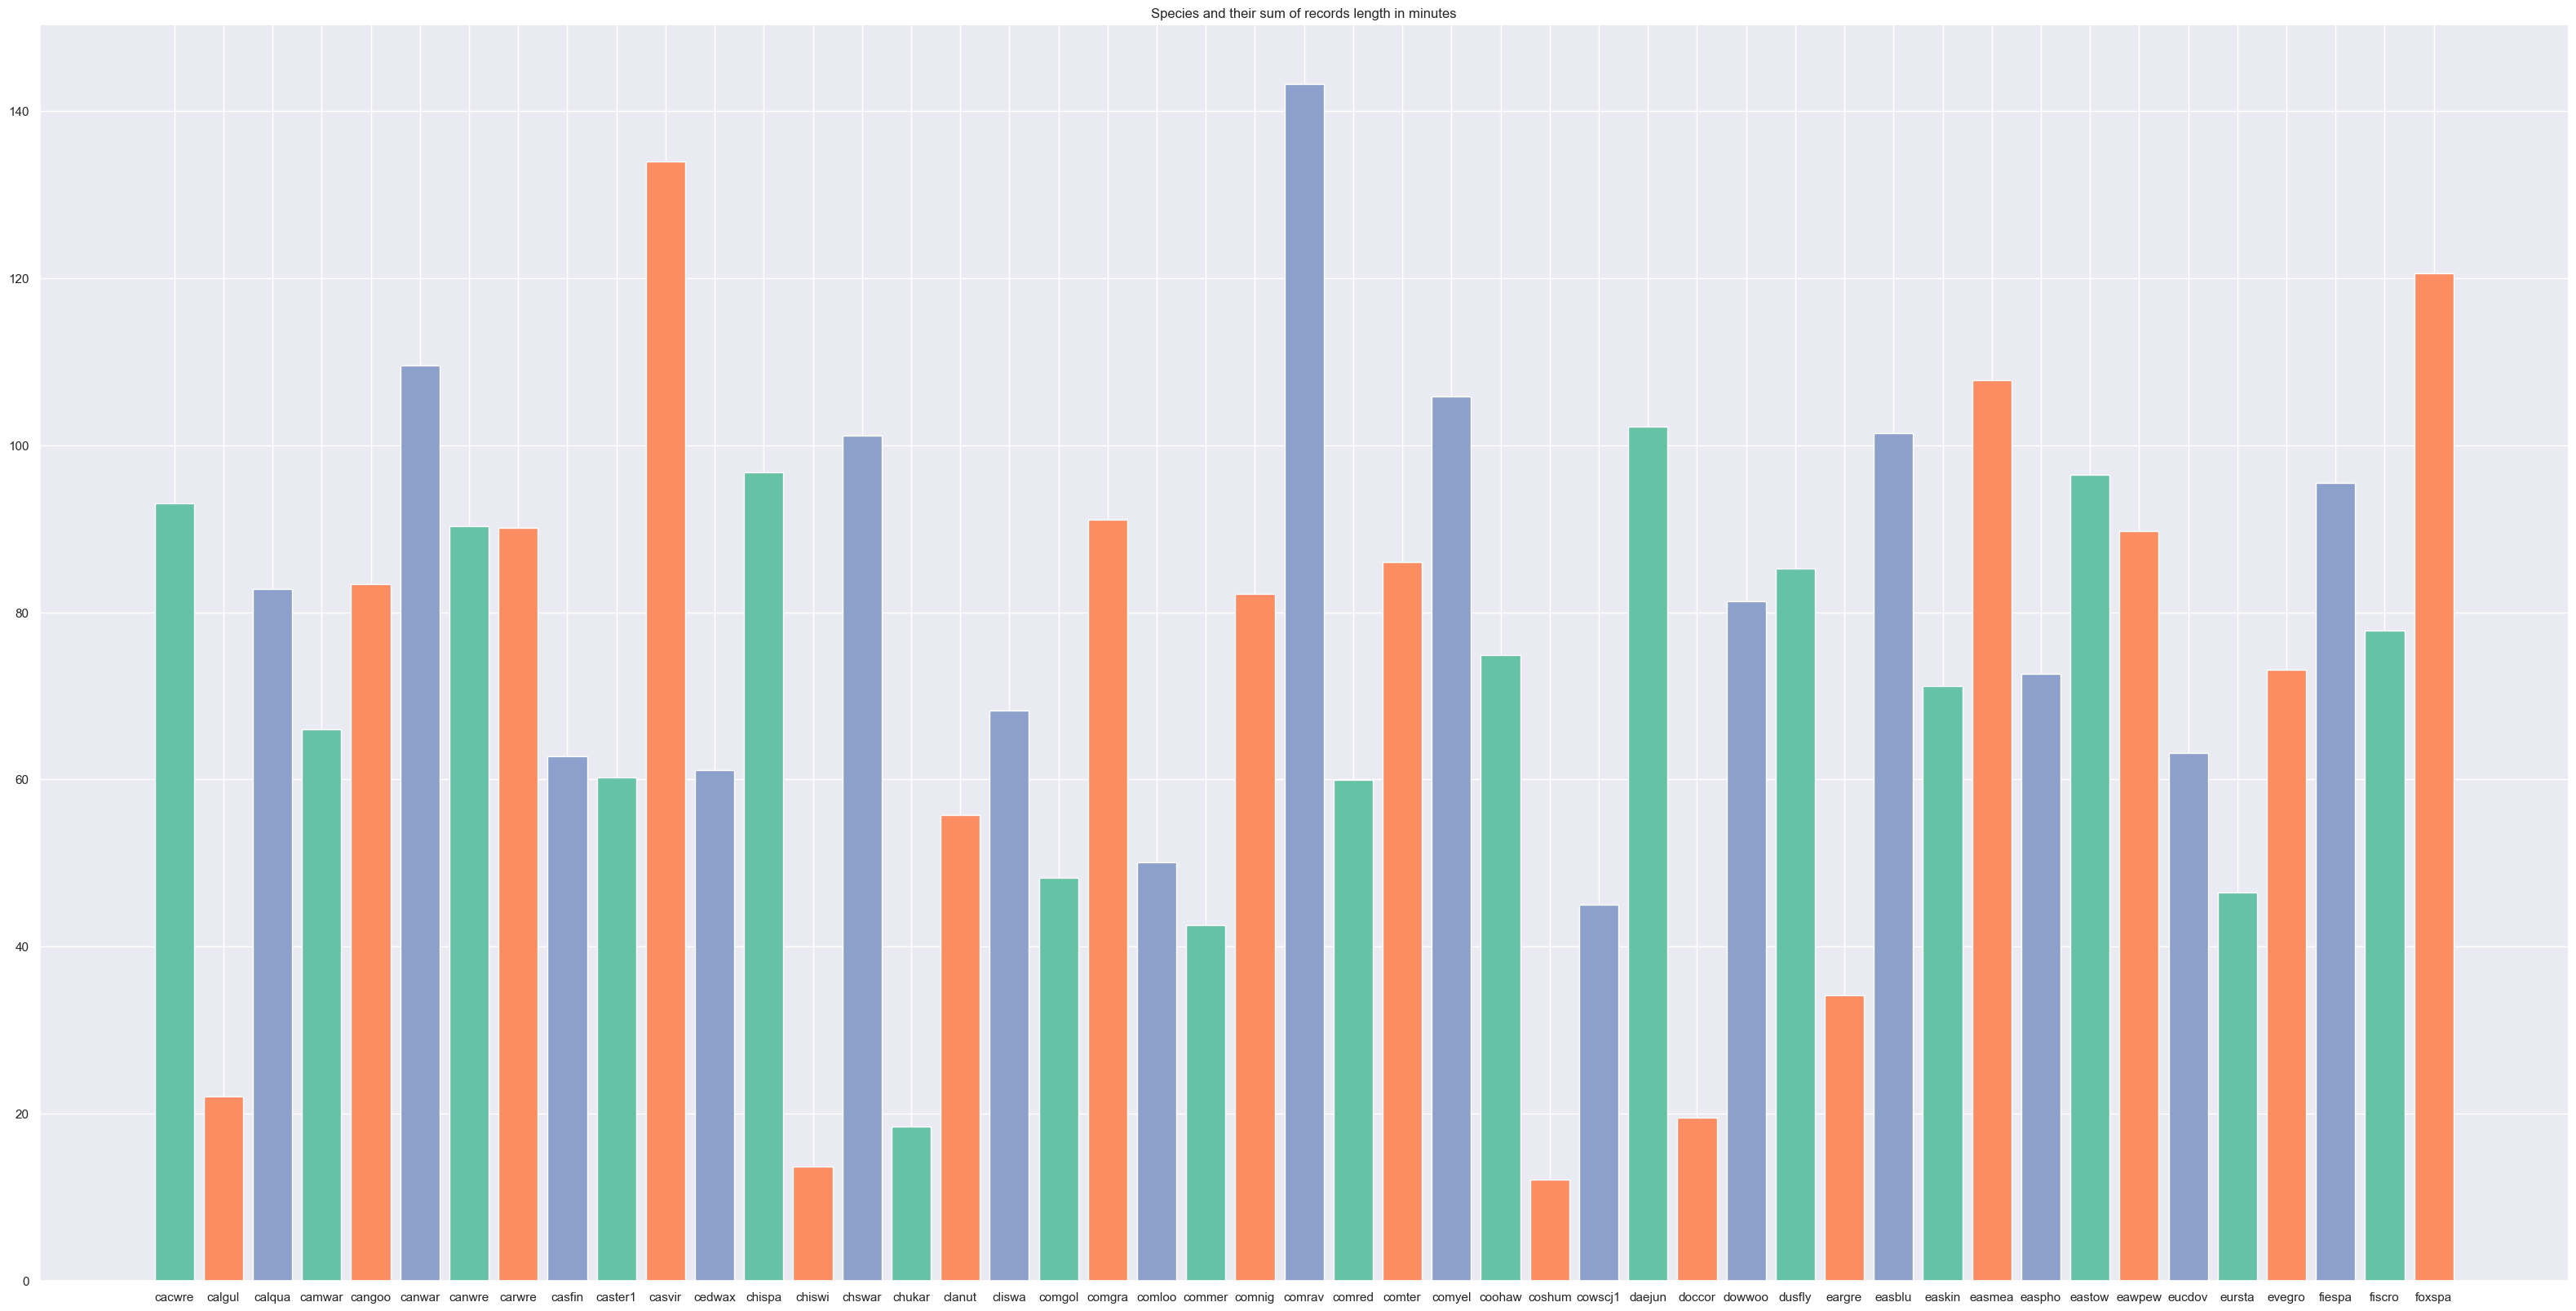

In [218]:
plt.figure(figsize=(40, 20))
plt.bar(df["Species"], df["TotalAudioRecordLengthInMinutes"], color=COLORS)
plt.title("Species and their sum of records length in minutes")

Text(0.5, 1.0, 'Percentage of audio length in minutes in relation to whole dataset')

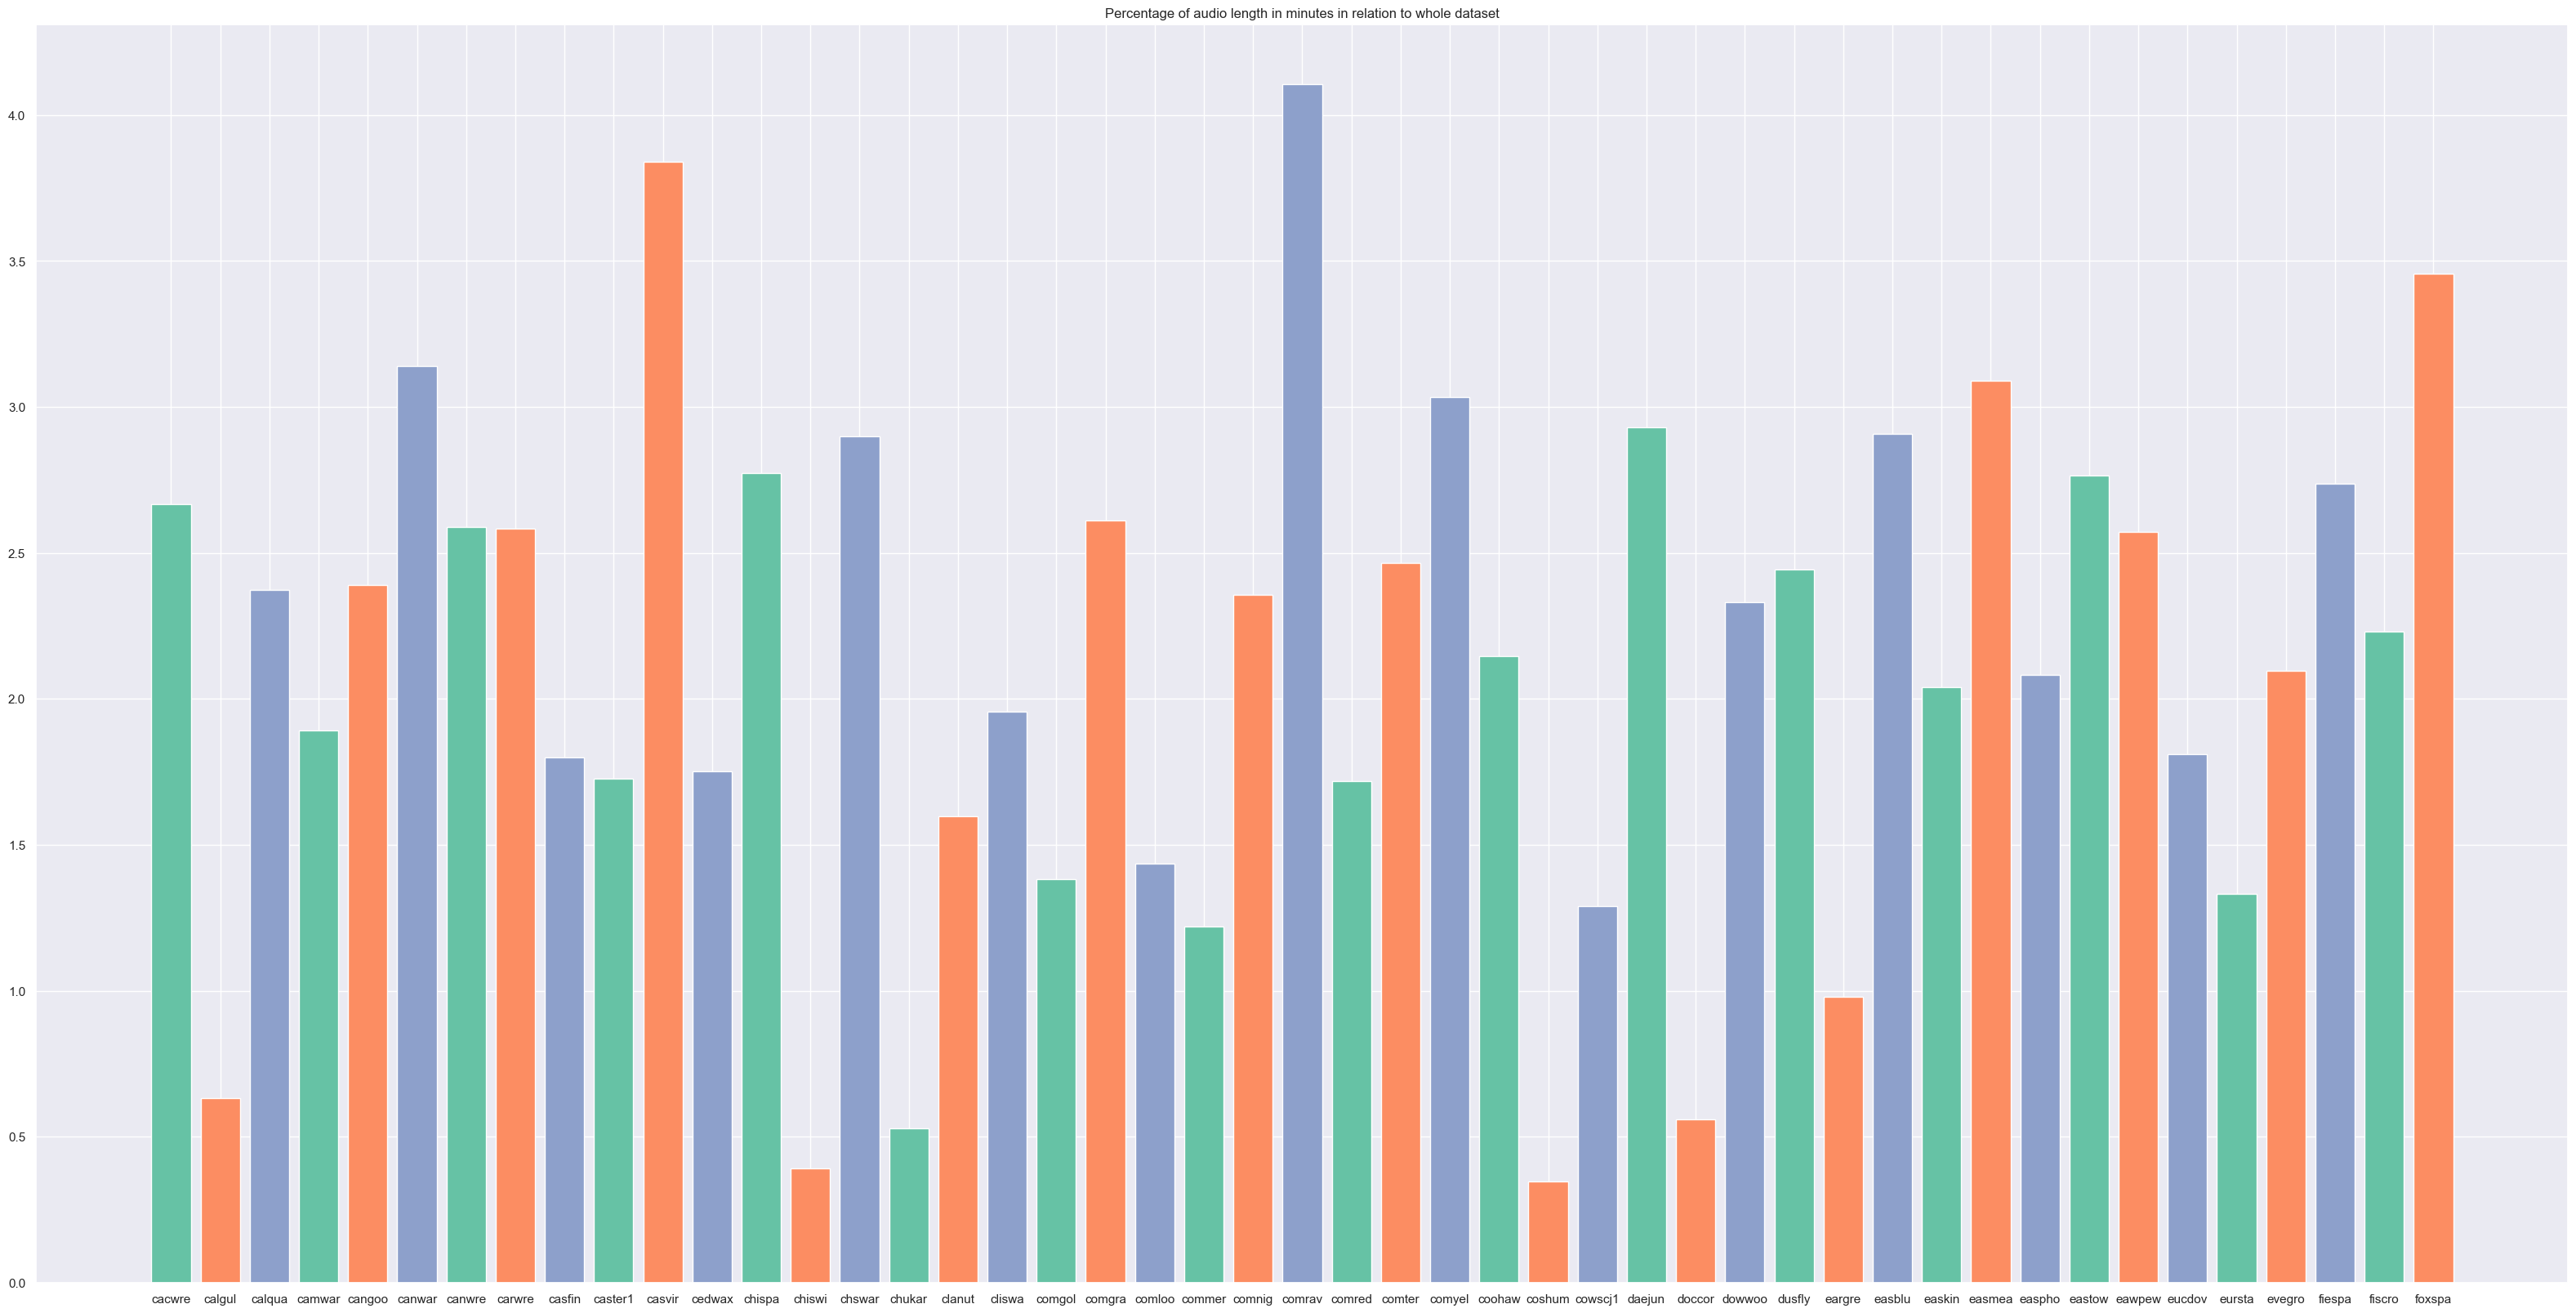

In [223]:
plt.figure(figsize=(40, 20))
plt.bar(df["Species"], df["PercentageOfAllRecords"], color=COLORS)
plt.title("Percentage of audio length in minutes in relation to whole dataset")

Text(0.5, 1.0, 'Mean of the audio length')

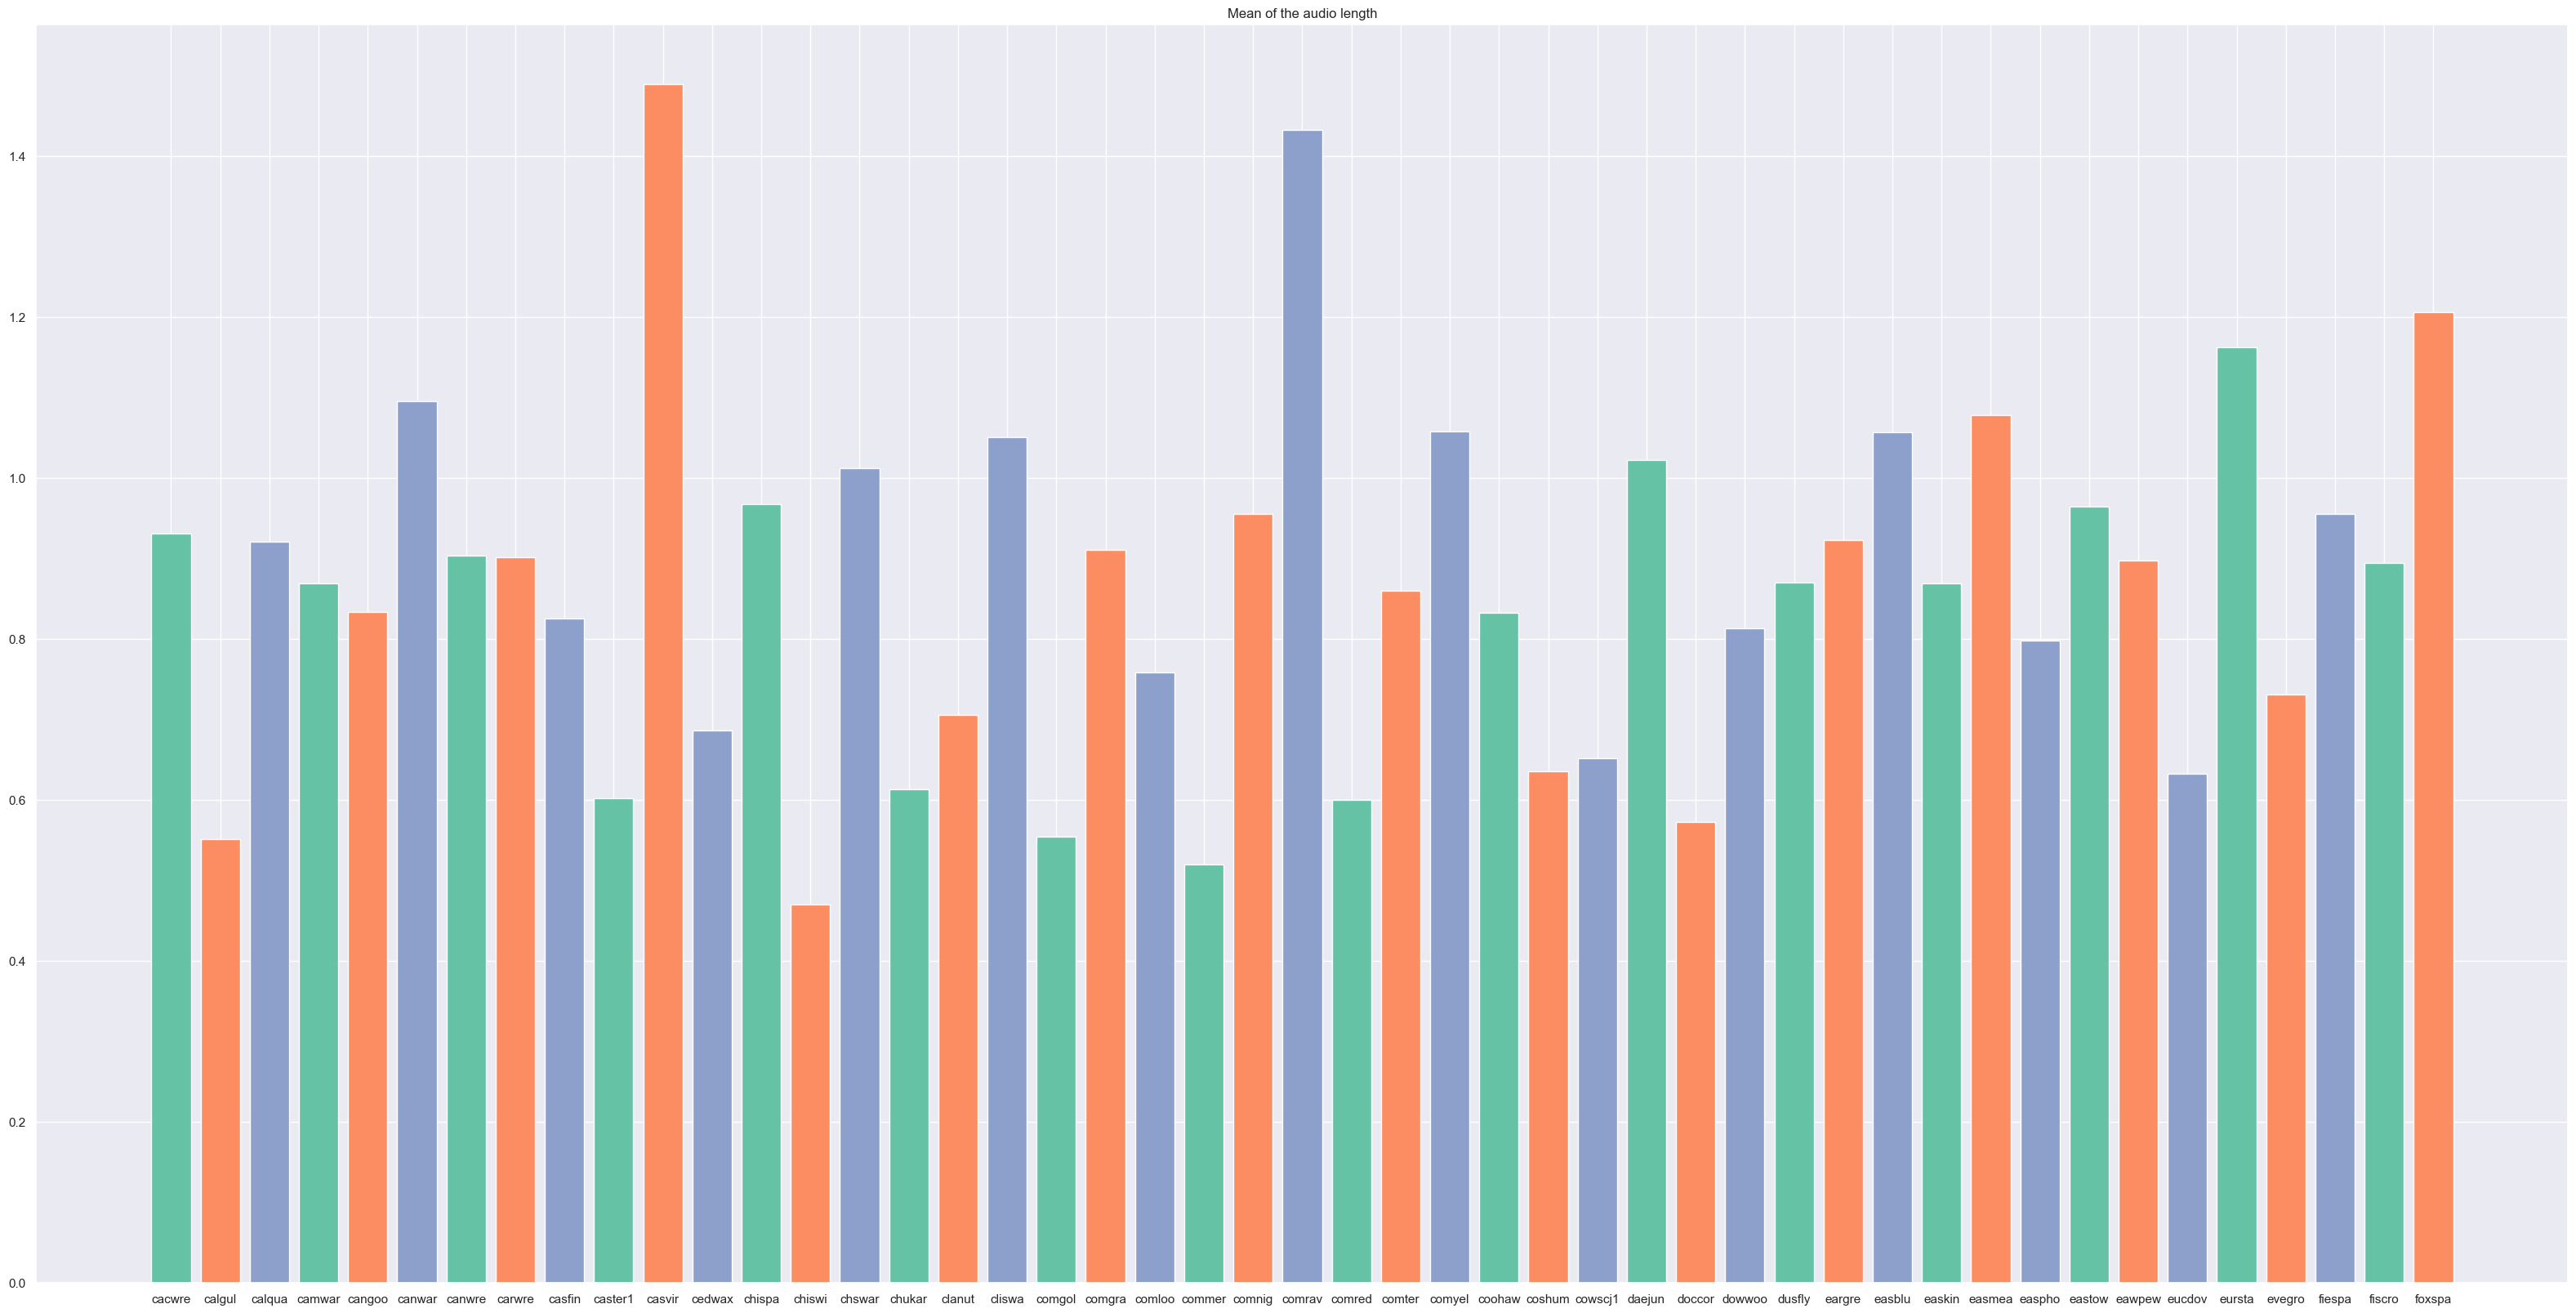

In [224]:
plt.figure(figsize=(40, 20))
plt.bar(df["Species"], df["MeanOfAudioLengthInMinutes"], color=COLORS)
plt.title("Mean of the audio length")